In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
#import imblearn

from scipy import stats

bikeday = pd.read_csv('day.csv')
bikehour = pd.read_csv('hour.csv')

In [2]:
bikehour.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False  False  False  False    False    False   
1        False   False   False  False  False  False    False    False   
2        False   False   False  False  False  False    False    False   
3        False   False   False  False  False  False    False    False   
4        False   False   False  False  False  False    False    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
17374    False   False   False  False  False  False    False    False   
17375    False   False   False  False  False  False    False    False   
17376    False   False   False  False  False  False    False    False   
17377    False   False   False  False  False  False    False    False   
17378    False   False   False  False  False  False    False    False   

       workingday  weathersit   temp  atemp    hum  windspeed

In [3]:
bikeday.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      instant  dteday  season     yr   mnth  holiday  weekday  workingday  \
0      False   False   False  False  False    False    False       False   
1      False   False   False  False  False    False    False       False   
2      False   False   False  False  False    False    False       False   
3      False   False   False  False  False    False    False       False   
4      False   False   False  False  False    False    False       False   
..       ...     ...     ...    ...    ...      ...      ...         ...   
726    False   False   False  False  False    False    False       False   
727    False   False   False  False  False    False    False       False   
728    False   False   False  False  False    False    False       False   
729    False   False   False  False  False    False    False       False   
730    False   False   False  False  False    False    False       False   

     weathersit   temp  a

In [4]:
bikeday.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
bikehour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
bikeday.shape

(731, 16)

In [8]:
bikehour.shape

(17379, 17)

In [9]:
bikeday.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
bikehour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# Do the conversion and renaming, expanding of feature set here

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = hdf[['hour','total_count','season']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'season');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Season wise hourly distribution of bike rentals',ylabel= 'mean(total_count)');


In [ ]:
sns.distplot(hdf.total_count);

In [ ]:
# sample example
q1 = hdf.cnt.quantile(0.25)
q3 = hdf.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
hdf = hdf.loc[(hdf.cnt >= lower_bound) & (hdf.cnt <= upper_bound)]

In [ ]:
# An alternative approach would be the transformation of the target values to a normal distribution and using mean and standard deviation.
hdf = hdf[np.abs(hdf["total_count"]-hdf["total_count"].mean()) <= 3*hdf["total_count"].std()]

In [ ]:
# This is being left as an experiment for you to explore.
X = train
y= y.total_count.values.reshape(-1,1)

lin_reg = linear_model.LinearRegression()

In [ ]:
# You can use the k-fold cross validation (specifically 10-fold) as shown in the following snippet.
predicted = cross_val_predict(lin_reg, X, y, cv=10)

In [ ]:
# You can also make it a function and pass arguments accordingly.
models=[RandomForestRegressor(max_features= 'auto', n_estimators= 100, n_jobs= -1),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
rmse = []
d1= {}
d2 = {} 
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test, squared=False)))

d1={'Modelling Algo':model_names,'RMSLE':rmsle}   


d2={'Modelling Algo':model_names,'RMSE':rmse}   



rmsle_frame=pd.DataFrame(d1)
#rmsle_frame

rmse_frame=pd.DataFrame(d2)
#rmse_frame


sns.catplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',height=5,aspect=2);

In [ ]:
# RMSE
sns.catplot(y='Modelling Algo',x='RMSE',data=rmse_frame,kind='bar',height=5,aspect=2);

In [ ]:
# Google map EXAMPLE
%%html

<iframe src="https://www.google.com/maps/d/u/0/embed?mid=1xwOR-Mjborq-vmpGz-JfhucdlDlAmo1c" width="640" height="480"></iframe>

In [ ]:
# For example, top 10 start stations by volume of traffic. (number of occurances)
data2011['Start station'].value_counts()[0:10].plot(kind = 'bar');

In [103]:
# Time Series
import datetime
df = pd.read_csv('202003-capitalbikeshare-tripdata.csv')
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])
df['End date'] - df['Start date']

0        0 days 00:26:36
1        0 days 00:07:28
2        0 days 00:04:43
3        0 days 00:10:42
4        0 days 00:05:47
               ...      
162525   0 days 00:11:14
162526   0 days 00:08:34
162527   0 days 00:25:25
162528   0 days 00:09:26
162529   0 days 00:17:35
Length: 162530, dtype: timedelta64[ns]

In [104]:
df.iloc[0:5]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [73]:
df.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [74]:
df.shape

(162530, 9)

In [75]:
type(df['Start date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [77]:
type(df['End date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [78]:
df.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
1,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
3,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
4,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member


In [79]:
df.index

RangeIndex(start=0, stop=162530, step=1)

In [105]:
df.index = df['Start date']

In [81]:
df.index

DatetimeIndex(['2020-03-01 00:01:16', '2020-03-01 00:02:04',
               '2020-03-01 00:03:45', '2020-03-01 00:05:49',
               '2020-03-01 00:06:53', '2020-03-01 00:10:26',
               '2020-03-01 00:14:30', '2020-03-01 00:15:17',
               '2020-03-01 00:16:20', '2020-03-01 00:17:39',
               ...
               '2020-03-31 22:59:36', '2020-03-31 23:02:31',
               '2020-03-31 23:03:29', '2020-03-31 23:08:10',
               '2020-03-31 23:14:43', '2020-03-31 23:17:58',
               '2020-03-31 23:18:13', '2020-03-31 23:29:00',
               '2020-03-31 23:41:17', '2020-03-31 23:45:05'],
              dtype='datetime64[ns]', name='Start date', length=162530, freq=None)

In [106]:
df['2020-03-01']['Duration']

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
                       ... 
2020-03-01 23:47:18     821
2020-03-01 23:49:41    1041
2020-03-01 23:51:25     704
2020-03-01 23:52:49     236
2020-03-01 23:58:59     487
Name: Duration, Length: 5322, dtype: int64

In [83]:
df['2020-03-17'][3456:3459]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
Start date,,,,,,,,,
2020-03-17 19:16:32,243,2020-03-17 19:16:32,2020-03-17 19:20:36,31294,7th & E St SW,31108,4th & M St SW,W21754,Member
2020-03-17 19:16:32,1032,2020-03-17 19:16:32,2020-03-17 19:33:45,31247,Jefferson Dr & 14th St SW,31120,10th & Florida Ave NW,W01468,Member
2020-03-17 19:16:38,775,2020-03-17 19:16:38,2020-03-17 19:29:33,31272,Washington & Independence Ave SW/HHS,31251,12th & L St NW,W23590,Member


In [84]:
sum(df['Start date'] >= df['End date'])

0

In [85]:
df['2020-03-12'][2001:2009]

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
Start date,,,,,,,,,
2020-03-12 09:06:50,375,2020-03-12 09:06:50,2020-03-12 09:13:05,31130,7th & S St NW,31642,4th St & K St NW,W22303,Member
2020-03-12 09:06:53,728,2020-03-12 09:06:53,2020-03-12 09:19:01,31113,Columbia Rd & Belmont St NW,31216,14th St & New York Ave NW,W23806,Member
2020-03-12 09:06:55,961,2020-03-12 09:06:55,2020-03-12 09:22:57,31303,Tenleytown / Wisconsin Ave & Albemarle St NW,31121,Calvert St & Woodley Pl NW,W20455,Member
2020-03-12 09:06:59,587,2020-03-12 09:06:59,2020-03-12 09:16:47,31244,4th & E St SW,31230,Metro Center / 12th & G St NW,W23546,Member
2020-03-12 09:07:06,717,2020-03-12 09:07:06,2020-03-12 09:19:03,31268,12th & U St NW,31655,New Jersey Ave & F St NW,W21093,Member
2020-03-12 09:07:09,574,2020-03-12 09:07:09,2020-03-12 09:16:43,31218,L'Enfant Plaza / 7th & C St SW,31238,14th & G St NW,W22263,Member
2020-03-12 09:07:17,301,2020-03-12 09:07:17,2020-03-12 09:12:18,31618,4th & East Capitol St NE,31623,Columbus Circle / Union Station,W20559,Member
2020-03-12 09:07:36,959,2020-03-12 09:07:36,2020-03-12 09:23:35,31118,3rd & Elm St NW,31621,4th & D St NW / Judiciary Square,W23077,Member


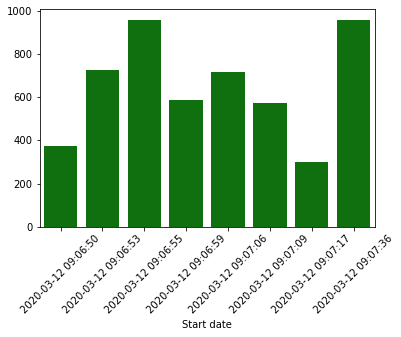

In [127]:
import matplotlib.pyplot as plt
ax = sns.barplot( x = df['2020-03-12']['Duration'][2001:2009].index, y = df['2020-03-12']['Duration'][2001:2009].values, color = 'green')

for item in ax.get_xticklabels():
    item.set_rotation(45)

In [108]:
df['2020-03-20']['Duration']

Start date
2020-03-20 00:01:03     784
2020-03-20 00:02:01     437
2020-03-20 00:07:23     600
2020-03-20 00:11:06     326
2020-03-20 00:12:22     350
                       ... 
2020-03-20 23:55:48    2702
2020-03-20 23:56:04    3217
2020-03-20 23:56:15    3210
2020-03-20 23:57:41    7447
2020-03-20 23:57:46    7571
Name: Duration, Length: 4809, dtype: int64

<AxesSubplot:xlabel='Start date'>

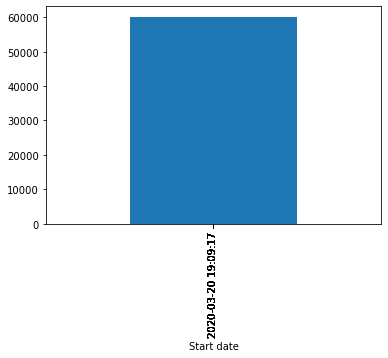

In [87]:
df['2020-03-20']['Duration'][4008:4020].plot(kind = 'bar')

In [88]:
df['2020-03-18'].shape

(3819, 9)

In [89]:
df['2020-03-18'].shape[0]

3819

In [90]:
df['2020-03-07']['Duration'].sum() / df['2020-03-07']['Duration'].shape[0] 

1065.615372194413

In [91]:
df['2020-03-07']['Duration'].sum() / df['2020-03-07']['Duration'].shape[0] / 60

17.760256203240218

In [92]:
trip_duration_per_trip = df['2020-03-07']['Duration'].sum() / df['2020-03-07']['Duration'].shape[0] / 60

In [93]:
trip_duration_per_trip

17.760256203240218

In [94]:
df['2020-03-07']['Duration'].sum()

6599356

In [95]:
trip_duration_per_trip_march = df['2020-03']['Duration'].sum() / df['2020-03']['Duration'].shape[0] / 60

In [96]:
trip_duration_per_trip_march

18.978877745646958

In [97]:
df

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
Start date,,,,,,,,,
2020-03-01 00:01:16,1596,2020-03-01 00:01:16,2020-03-01 00:27:52,31646,Maine Ave & 9th St SW,31509,New Jersey Ave & R St NW,W24217,Member
2020-03-01 00:02:04,448,2020-03-01 00:02:04,2020-03-01 00:09:32,31646,Maine Ave & 9th St SW,31272,Washington & Independence Ave SW/HHS,W21897,Member
2020-03-01 00:03:45,283,2020-03-01 00:03:45,2020-03-01 00:08:28,31224,18th & L St NW,31200,Massachusetts Ave & Dupont Circle NW,W21703,Member
2020-03-01 00:05:49,642,2020-03-01 00:05:49,2020-03-01 00:16:31,31603,1st & M St NE,31611,13th & H St NE,78571,Member
2020-03-01 00:06:53,347,2020-03-01 00:06:53,2020-03-01 00:12:40,31101,14th & V St NW,31114,18th St & Wyoming Ave NW,W23425,Member
...,...,...,...,...,...,...,...,...,...
2020-03-31 23:17:58,673,2020-03-31 23:17:58,2020-03-31 23:29:12,31235,19th St & Constitution Ave NW,31265,5th St & Massachusetts Ave NW,W22920,Member
2020-03-31 23:18:13,514,2020-03-31 23:18:13,2020-03-31 23:26:47,31203,14th & Rhode Island Ave NW,31324,18th & New Hampshire Ave NW,21054,Member
2020-03-31 23:29:00,1524,2020-03-31 23:29:00,2020-03-31 23:54:25,31110,20th St & Florida Ave NW,31403,5th & Kennedy St NW,W24341,Member


In [98]:
df = df['Duration']

In [99]:
df

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
                       ... 
2020-03-31 23:17:58     673
2020-03-31 23:18:13     514
2020-03-31 23:29:00    1524
2020-03-31 23:41:17     565
2020-03-31 23:45:05    1054
Name: Duration, Length: 162530, dtype: int64

In [100]:
df.loc['2020-03-01']

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
                       ... 
2020-03-01 23:47:18     821
2020-03-01 23:49:41    1041
2020-03-01 23:51:25     704
2020-03-01 23:52:49     236
2020-03-01 23:58:59     487
Name: Duration, Length: 5322, dtype: int64

In [101]:
df.iloc[0:5]

Start date
2020-03-01 00:01:16    1596
2020-03-01 00:02:04     448
2020-03-01 00:03:45     283
2020-03-01 00:05:49     642
2020-03-01 00:06:53     347
Name: Duration, dtype: int64

In [4]:
df_json = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_status.json')
df_json

,data,last_updated,ttl
stations,"[{'last_reported': 1611652631, 'eightd_has_ava...",1611731795,5


In [5]:
len(df_json.data['stations'])

621

In [6]:
df_json.data['stations'][1]['num_bikes_available']

1

<AxesSubplot:>

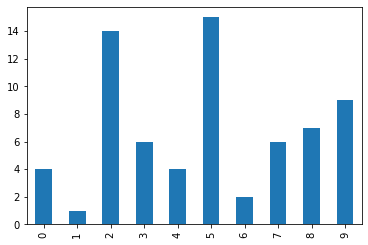

In [7]:
no_bikes = []
for i in range(len(df_json.data['stations'])):
    no_bikes.append(df_json.data['stations'][i]['num_bikes_available'])

pd.Series(no_bikes)[0:10].plot(kind='bar')